In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading dataset

In [2]:
insurance = pd.read_csv('fraud_oracle.csv')

# EDA

In [3]:
insurance.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
insurance.shape

(15420, 33)

In [5]:
insurance.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [6]:
import pandas as pd

def summarize(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'N Unique': df.nunique(),
        'Unique': df.apply(lambda x: x.unique().tolist()),
        'Max': df.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else '-'),
        'Min': df.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else '-'),
        'Mean': df.apply(lambda x: round(x.mean(), 2) if pd.api.types.is_numeric_dtype(x) else '-'),
        'Median': df.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else '-'),
        'Mode': df.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '-'),
        'Range': df.apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else '-'),
        'Variance': df.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else '-'),
        'Standard Deviation': df.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else '-'),
        'Skewness': df.apply(lambda x: round(x.skew(), 2) if pd.api.types.is_numeric_dtype(x) else '-'),
        'Kurtosis': df.apply(lambda x: round(x.kurt(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    })

    return summary

# Summarize the insurance dataset
summary = summarize(insurance)
summary



,Data Type,N Unique,Unique,Max,Min,Mean,Median,Mode,Range,Variance,Standard Deviation,Skewness,Kurtosis
Month,object,12,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...",-,-,-,-,Jan,-,-,-,-,-
WeekOfMonth,int64,5,"[5, 3, 2, 4, 1]",5,1,2.79,3.0,3,4,1.657876,1.287585,0.12,-1.1
DayOfWeek,object,7,"[Wednesday, Friday, Saturday, Monday, Tuesday,...",-,-,-,-,Monday,-,-,-,-,-
Make,object,19,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...",-,-,-,-,Pontiac,-,-,-,-,-
AccidentArea,object,2,"[Urban, Rural]",-,-,-,-,Urban,-,-,-,-,-
DayOfWeekClaimed,object,8,"[Tuesday, Monday, Thursday, Friday, Wednesday,...",-,-,-,-,Monday,-,-,-,-,-
MonthClaimed,object,13,"[Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...",-,-,-,-,Jan,-,-,-,-,-
WeekOfMonthClaimed,int64,5,"[1, 4, 2, 3, 5]",5,1,2.69,3.0,2,4,1.585371,1.259115,0.16,-1.09
Sex,object,2,"[Female, Male]",-,-,-,-,Male,-,-,-,-,-
MaritalStatus,object,4,"[Single, Married, Widow, Divorced]",-,-,-,-,Married,-,-,-,-,-


The "PolicyNumber" is simply an identification number and does not contribute to the analysis. It should be dropped.

The features "Sex", "PoliceReportFiled", and "WitnessPresent" are Boolean types. These should be converted to 0 or 1.

The features "AccidentalArea", "Fault", and "AgentType" each have only two unique values and can also be converted to 0 or 1.

The minimum value of "Age" is 0, which is illogical. This issue needs further investigation.

The features "FraudFound_P" and "Deductible" are highly skewed. Typically, a feature is considered skewed if its skewness falls outside the range of -0.5 to 0.5.

The features "WeekOfMonth", "WeekOfMonthClaimed", "FraudFound_P", "Deductible", and "DriverRating" exhibit high kurtosis. Typically, a feature is considered to have high kurtosis if its value falls outside the range of -1 to 1.

Among all the features, only "Age" is strictly a numeric variable. The rest should be interpreted as categorical variables.

In [7]:
insurance.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
insurance.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [9]:
categorical_var = insurance.select_dtypes(include = ['object'])
print('Categorical varaibles are:')
for i in categorical_var:
    print(i)

print('')
numerical_var = insurance.select_dtypes(include = ['int64', 'float64'])
print('Numerical varaibles are:')
for i in numerical_var:
    print(i)

Categorical varaibles are:
Month
DayOfWeek
Make
AccidentArea
DayOfWeekClaimed
MonthClaimed
Sex
MaritalStatus
Fault
PolicyType
VehicleCategory
VehiclePrice
Days_Policy_Accident
Days_Policy_Claim
PastNumberOfClaims
AgeOfVehicle
AgeOfPolicyHolder
PoliceReportFiled
WitnessPresent
AgentType
NumberOfSuppliments
AddressChange_Claim
NumberOfCars
BasePolicy

Numerical varaibles are:
WeekOfMonth
WeekOfMonthClaimed
Age
FraudFound_P
PolicyNumber
RepNumber
Deductible
DriverRating
Year


### Univerate analysis

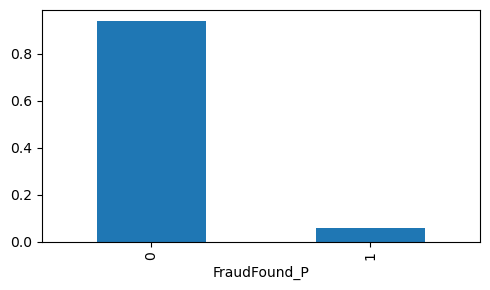

In [10]:
plt.figure(figsize = (5,3))
insurance['FraudFound_P'].value_counts(normalize = True).plot(kind = 'bar')
plt.tight_layout()
plt.show()

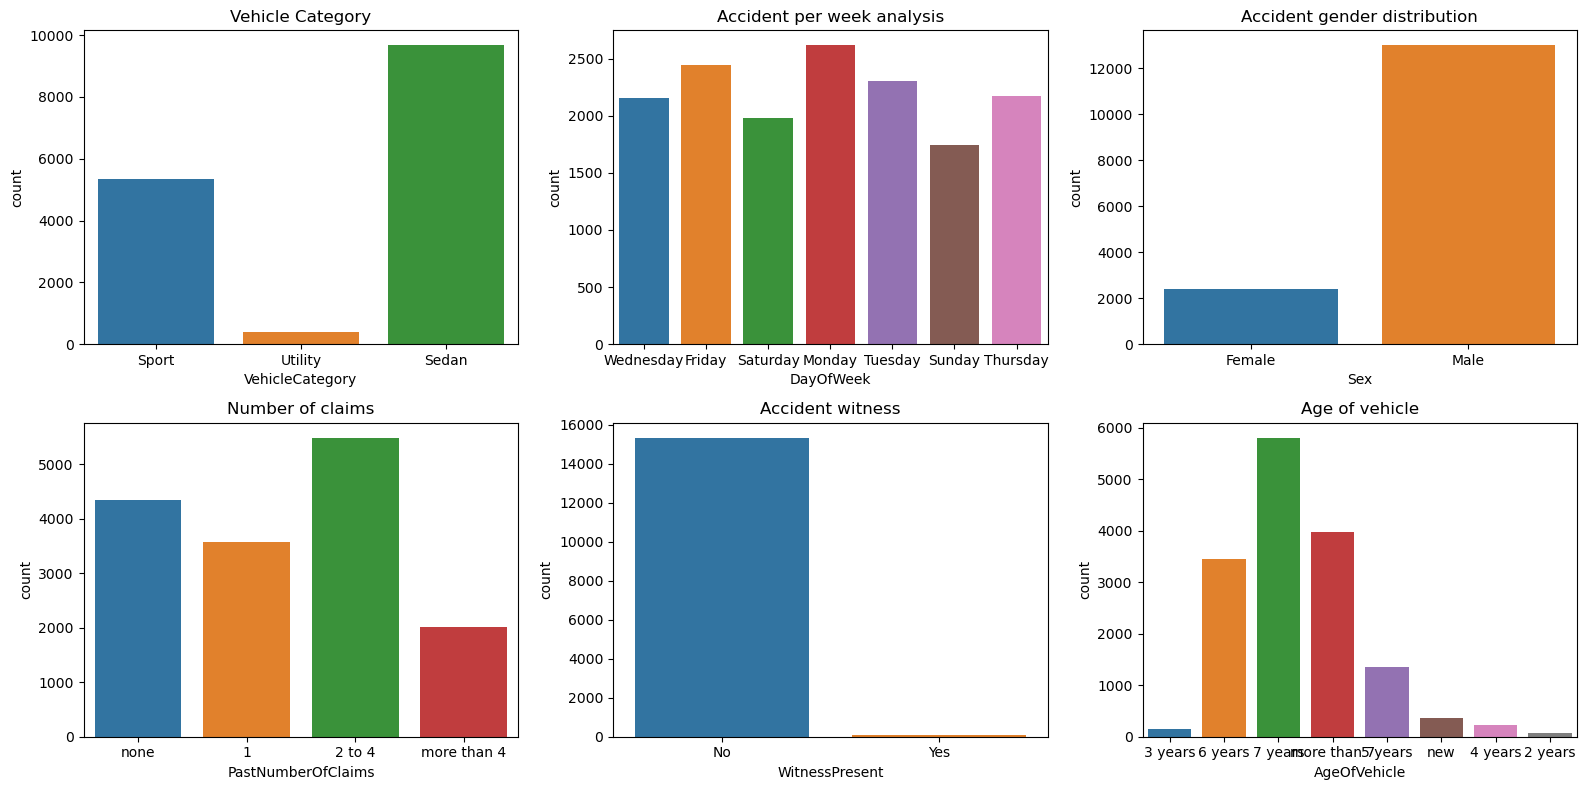

In [11]:
# Creating a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Plotting each countplot in its respective subplot
sns.countplot(data=insurance, x='VehicleCategory', ax=axes[0, 0])
sns.countplot(data=insurance, x='DayOfWeek', ax=axes[0, 1])
sns.countplot(data=insurance, x='Sex', ax=axes[0, 2])
sns.countplot(data=insurance, x='PastNumberOfClaims', ax=axes[1, 0])
sns.countplot(data=insurance, x='WitnessPresent', ax=axes[1, 1])
sns.countplot(data=insurance, x='AgeOfVehicle', ax=axes[1, 2])

# Setting titles for each subplot
axes[0, 0].set_title('Vehicle Category')
axes[0, 1].set_title('Accident per week analysis')
axes[0, 2].set_title('Accident gender distribution')
axes[1, 0].set_title('Number of claims')
axes[1, 1].set_title('Accident witness')
axes[1, 2].set_title('Age of vehicle')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

#### Numerical Analysis

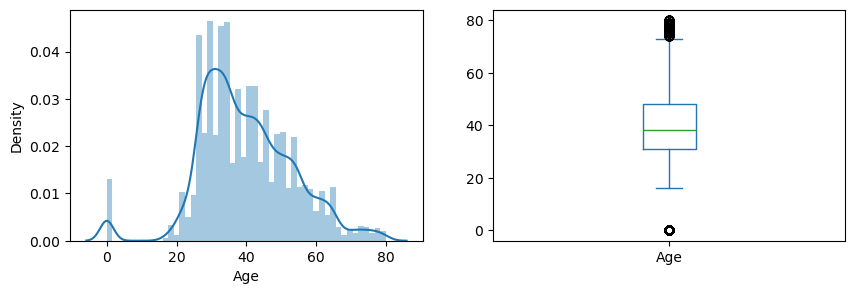

In [12]:
fig, axes = plt.subplots(1,2, figsize = (10,3))
sns.distplot(insurance['Age'], ax = axes[0])
insurance['Age'].plot.box(ax = axes[1])
plt.show()

<Axes: xlabel='WeekOfMonth', ylabel='count'>

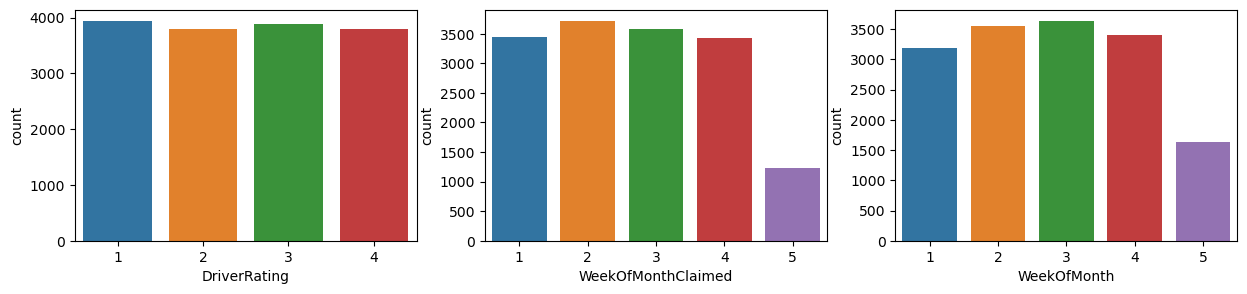

In [13]:
fig, axes = plt.subplots(1,3, figsize = (15,3))
sorted_values = insurance.sort_values(by = 'DriverRating', ascending = False)
sorted_claims = insurance.sort_values(by = 'WeekOfMonthClaimed', ascending = False)
sns.countplot(data = sorted_values, x = 'DriverRating', ax = axes[0])
sns.countplot(data = sorted_claims, x = 'WeekOfMonthClaimed', ax = axes[1])
sns.countplot(data = insurance, x  = 'WeekOfMonth', ax = axes[2])

## Bivariate analysis

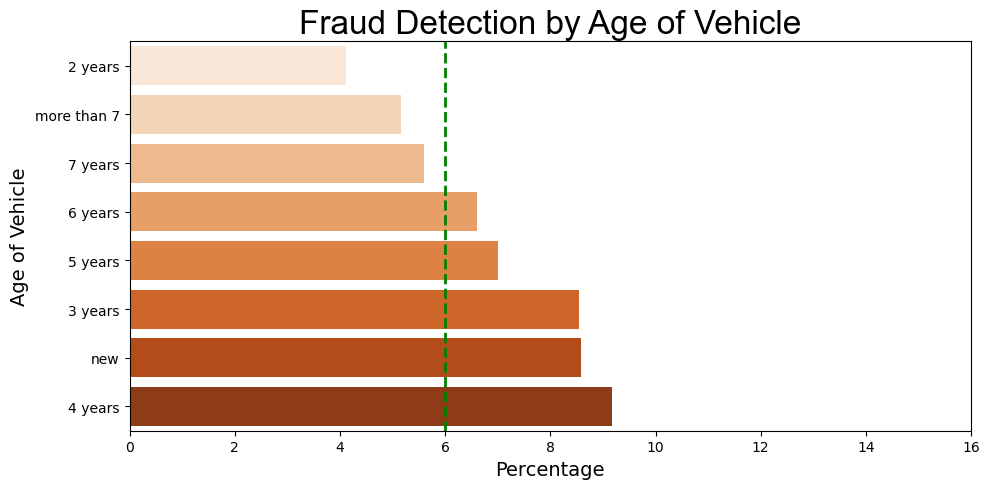

In [14]:
# Calculate the percentage of fraud by the age of the vehicle
df_counts_ageofvehicle = insurance['AgeOfVehicle'].value_counts().sort_index()
df_counts_fraud = insurance[insurance['FraudFound_P'] == 1]['AgeOfVehicle'].value_counts().sort_index()
df_percentages_fraud = pd.DataFrame(round((df_counts_fraud / df_counts_ageofvehicle) * 100, 2)).fillna(0).reset_index()

df_percentages_fraud.columns = ['AgeOfVehicle', 'Fraud %']
df_percentages_fraud = df_percentages_fraud.sort_values(by=['Fraud %'])

# Bar Chart using seaborn
plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Fraud %', y='AgeOfVehicle', data=df_percentages_fraud, palette='Oranges')

# Add a reference line at 6%
plt.axvline(x=6, color='green', linestyle='--', linewidth=2)

# Customizing the plot
plt.title('Fraud Detection by Age of Vehicle', fontsize=24, fontfamily='Arial')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Age of Vehicle', fontsize=14)
plt.xlim(0, 16)
plt.xticks(ticks=range(0, 17, 2))

# Show plot
plt.tight_layout()
plt.show()

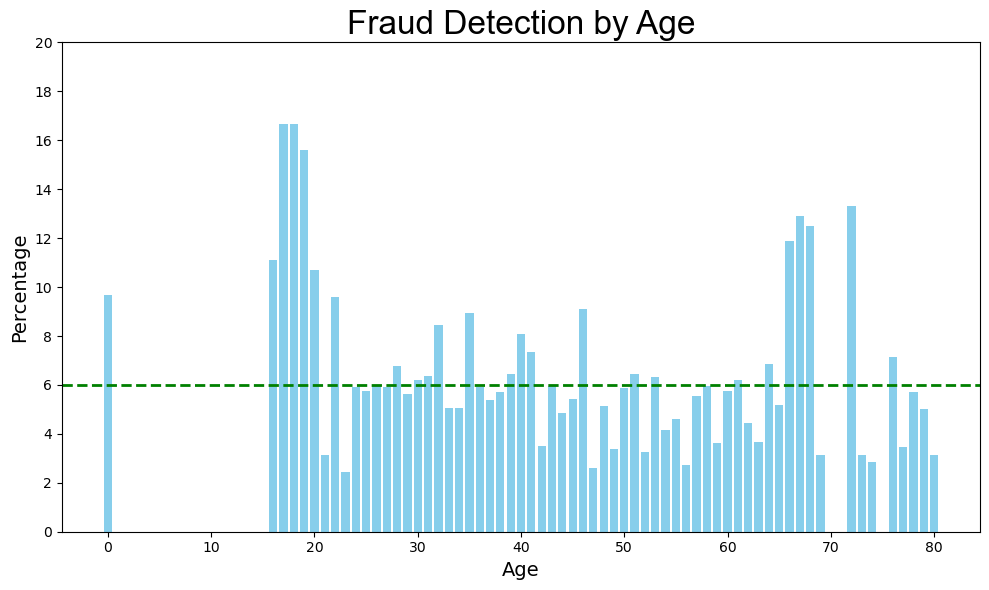

In [15]:
# Filter data for fraud cases
df_fraud = insurance[insurance['FraudFound_P'] == 1]

# Calculate counts by Age
df_counts_age = insurance['Age'].value_counts().sort_index()
df_counts_fraud = df_fraud['Age'].value_counts().sort_index()

# Calculate percentages
df_percentages_fraud = round((df_counts_fraud / df_counts_age) * 100, 2)

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df_percentages_fraud.index, df_percentages_fraud.values, color='skyblue')

# Add title and labels
plt.title('Fraud Detection by Age', fontsize=24, fontfamily='Arial')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 20)
plt.yticks(range(0, 21, 2))

# Add a reference line at 6%
plt.axhline(y=6, color='green', linestyle='--', linewidth=2)

# Show plot
plt.tight_layout()
plt.show()


Fraud is often identified among teenagers and retired seniors. Teenagers typically lack financial independence due to their early stage in economic activity, while retired seniors face financial vulnerability post-retirement. These observations suggest a correlation between financial vulnerability and the incidence of fraud

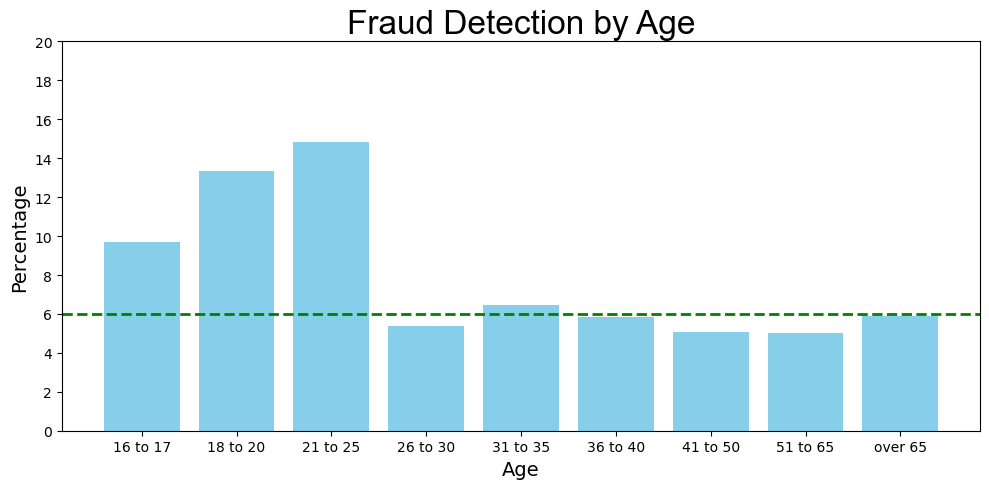

In [16]:
# Filter data for fraud cases
df_fraud = insurance[insurance['FraudFound_P'] == 1]

# Calculate counts by Age
df_counts_age = insurance['AgeOfPolicyHolder'].value_counts().sort_index()
df_counts_fraud = df_fraud['AgeOfPolicyHolder'].value_counts().sort_index()

# Calculate percentages
df_percentages_fraud = round((df_counts_fraud / df_counts_age) * 100, 2)

# Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(df_percentages_fraud.index, df_percentages_fraud.values, color='skyblue')

# Add title and labels
plt.title('Fraud Detection by Age', fontsize=24, fontfamily='Arial')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 20)
plt.yticks(range(0, 21, 2))

# Add a reference line at 6%
plt.axhline(y=6, color='green', linestyle='--', linewidth=2)

# Show plot
plt.tight_layout()
plt.show()


Conversely, only the under-25 age group exhibits a high fraud rate in Age of Policy Holder feature

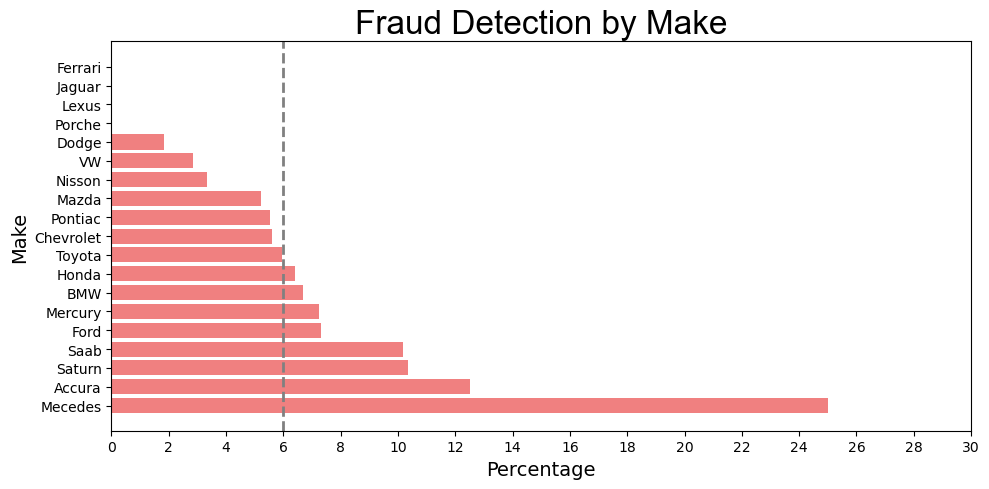

In [17]:
# Filter data for fraud cases
df_fraud = insurance[insurance['FraudFound_P'] == 1]

# Calculate counts by Make
df_counts_make = insurance['Make'].value_counts().sort_index()
df_counts_fraud2 = df_fraud['Make'].value_counts().sort_index()

# Calculate percentages
df_percentages_fraud2 = pd.DataFrame(round((df_counts_fraud2 / df_counts_make) * 100, 2)).fillna(0).reset_index()
df_percentages_fraud2.columns = ['Make', 'Fraud %']
df_percentages_fraud2 = df_percentages_fraud2.sort_values(by=['Fraud %', 'Make'])

# Bar Chart
plt.figure(figsize=(10, 5))
plt.barh(df_percentages_fraud2['Make'], df_percentages_fraud2['Fraud %'], color='lightcoral')

# Add title and labels
plt.title('Fraud Detection by Make', fontsize=24, fontfamily='Arial')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Make', fontsize=14)
plt.xlim(0, 30)
plt.xticks(range(0, 31, 2))
plt.gca().invert_yaxis()  # Invert y-axis to show highest percentage at the top

# Add a reference line at 6%
plt.axvline(x=6, color='gray', linestyle='--', linewidth=2)

# Show plot
plt.tight_layout()
plt.show()


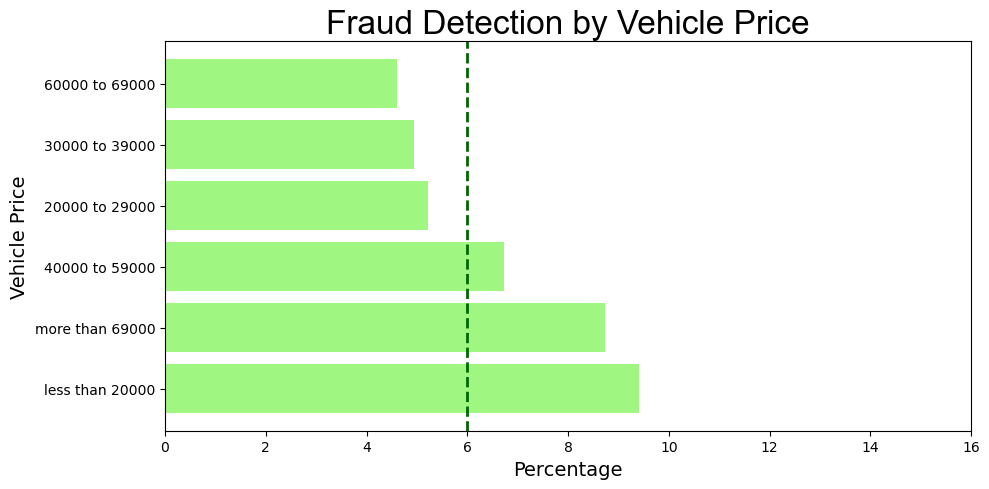

In [18]:
# Filter data for fraud cases
df_fraud = insurance[insurance['FraudFound_P'] == 1]

# Calculate counts by VehiclePrice
df_counts_vp = insurance['VehiclePrice'].value_counts().sort_index()
df_counts_fraud3 = df_fraud['VehiclePrice'].value_counts().sort_index()

# Calculate percentages
df_percentages_fraud3 = pd.DataFrame(round((df_counts_fraud3 / df_counts_vp) * 100, 2)).fillna(0).reset_index()
df_percentages_fraud3.columns = ['VehiclePrice', 'Fraud %']
df_percentages_fraud3 = df_percentages_fraud3.sort_values(by=['Fraud %'])

# Bar Chart
plt.figure(figsize=(10, 5))
plt.barh(df_percentages_fraud3['VehiclePrice'], df_percentages_fraud3['Fraud %'], color='#9FF781')

# Add title and labels
plt.title('Fraud Detection by Vehicle Price', fontsize=24, fontfamily='Arial')
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Vehicle Price', fontsize=14)
plt.xlim(0, 16)
plt.xticks(range(0, 17, 2))
plt.gca().invert_yaxis()  # Invert y-axis to show highest percentage at the top

# Add a reference line at 6%
plt.axvline(x=6, color='darkgreen', linestyle='--', linewidth=2)

# Show plot
plt.tight_layout()
plt.show()


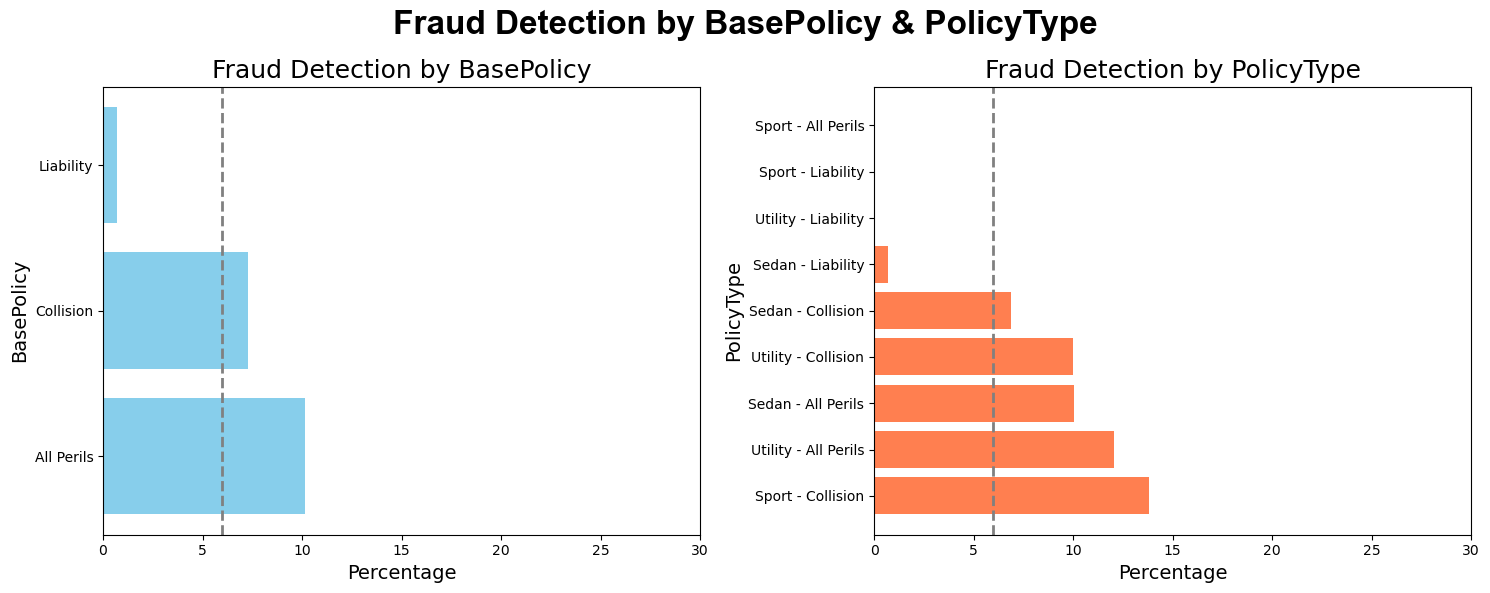

In [19]:
# Filter data for fraud cases
df_fraud = insurance[insurance['FraudFound_P'] == 1]

# Calculate percentages for BasePolicy
df_counts_policy = insurance['BasePolicy'].value_counts().sort_index()
df_counts_fraud4 = df_fraud['BasePolicy'].value_counts().sort_index()
df_percentages_fraud4 = pd.DataFrame(round((df_counts_fraud4 / df_counts_policy) * 100, 2)).fillna(0).reset_index()
df_percentages_fraud4.columns = ['BasePolicy', 'Fraud %']
df_percentages_fraud4 = df_percentages_fraud4.sort_values(by=['Fraud %'])

# Calculate percentages for PolicyType
df_counts_policy2 = insurance['PolicyType'].value_counts().sort_index()
df_counts_fraud5 = df_fraud['PolicyType'].value_counts().sort_index()
df_percentages_fraud5 = pd.DataFrame(round((df_counts_fraud5 / df_counts_policy2) * 100, 2)).fillna(0).reset_index()
df_percentages_fraud5.columns = ['PolicyType', 'Fraud %']
df_percentages_fraud5 = df_percentages_fraud5.sort_values(by=['Fraud %'])

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for BasePolicy
ax1.barh(df_percentages_fraud4['BasePolicy'], df_percentages_fraud4['Fraud %'], color='skyblue')
ax1.set_title('Fraud Detection by BasePolicy', fontsize=18)
ax1.set_xlabel('Percentage', fontsize=14)
ax1.set_ylabel('BasePolicy', fontsize=14)
ax1.set_xlim(0, 30)
ax1.axvline(x=6, color='gray', linestyle='--', linewidth=2)
ax1.invert_yaxis()

# Bar chart for PolicyType
ax2.barh(df_percentages_fraud5['PolicyType'], df_percentages_fraud5['Fraud %'], color='coral')
ax2.set_title('Fraud Detection by PolicyType', fontsize=18)
ax2.set_xlabel('Percentage', fontsize=14)
ax2.set_ylabel('PolicyType', fontsize=14)
ax2.set_xlim(0, 30)
ax2.axvline(x=6, color='gray', linestyle='--', linewidth=2)
ax2.invert_yaxis()

# Overall title
fig.suptitle('Fraud Detection by BasePolicy & PolicyType', fontsize=24, fontweight='bold', fontfamily='Arial')

plt.tight_layout()
plt.show()


# Modeling

#### a. Data Transformation - Encoding Categorical Variables (Binary Variable) - Label Encoding

In [20]:
binary_columns = [col for col in insurance.columns if insurance[col].nunique() == 2 and col != 'FraudFound_P']

print('The number of Binary Columns: ', len(binary_columns))
print('Binary Columns: ', binary_columns)

The number of Binary Columns:  6
Binary Columns:  ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']


In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate over binary columns and transform them
for col in binary_columns:
    insurance[col] = le.fit_transform(insurance[col])
    print(f"Column: {col} - Label Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Column: AccidentArea - Label Mapping: {'Rural': 0, 'Urban': 1}
Column: Sex - Label Mapping: {'Female': 0, 'Male': 1}
Column: Fault - Label Mapping: {'Policy Holder': 0, 'Third Party': 1}
Column: PoliceReportFiled - Label Mapping: {'No': 0, 'Yes': 1}
Column: WitnessPresent - Label Mapping: {'No': 0, 'Yes': 1}
Column: AgentType - Label Mapping: {'External': 0, 'Internal': 1}


#### b. Data Transformation - Encoding Categorical Variables (Ordinal Categorical Variables & Nominal Categorical Variables) - Label Encoding

In [22]:
columns_to_check = ['VehiclePrice', 'DriverRating', 'AgeOfVehicle', 'BasePolicy']

for col in columns_to_check:
    print(f"The unique values in {col}: {insurance[col].unique()}")


The unique values in VehiclePrice: ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']
The unique values in DriverRating: [1 4 3 2]
The unique values in AgeOfVehicle: ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
The unique values in BasePolicy: ['Liability' 'Collision' 'All Perils']


#### DriverRating:  
The feature "DriverRating" is already numeric, so no transformation was needed.

#### VehiclePrice:  
Converted "VehiclePrice" into a binary variable rather than an ordinal one. This decision was based on the observation that the categories "more than 69000" and "less than 20000" have the highest fraud rates, indicating the feature does not follow an ordinal pattern.

#### AgeOfVehicle:  
Transformed "AgeOfVehicle" into a nominal categorical variable for the same reason as "VehiclePrice." However, this feature can be re-classified into three categories.

#### BasePolicy:  
Only "BasePolicy" retains its natural characteristic as an ordinal categorical variable.

In [23]:
vehicleprice_label = {
    'more than 69000': 1,
    '20000 to 29000': 0,
    '30000 to 39000': 0,
    'less than 20000': 1,
    '40000 to 59000': 1,
    '60000 to 69000': 0
}

ageofvehicle_label = {
    'new': 2,
    '2 years': 0,
    '3 years': 2,
    '4 years': 2,
    '5 years': 1,
    '6 years': 1,
    '7 years': 0,
    'more than 7': 0
}

basepolicy_label = {
    'Liability': 0,
    'Collision': 1,
    'All Perils': 2
}

# Apply mappings
insurance['VehiclePrice'] = insurance['VehiclePrice'].map(vehicleprice_label)
insurance['AgeOfVehicle'] = insurance['AgeOfVehicle'].map(ageofvehicle_label)
insurance['BasePolicy'] = insurance['BasePolicy'].map(basepolicy_label)

# Create a copy of the modified dataframe
df_clean_v2 = insurance.copy()
df_clean_v2.shape


(15420, 33)

#### c. Data Reduction - Feature Selection 01 (Columns dropping)

In [24]:
# Drop columns
droped_columns = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber']
df_clean_v3 = df_clean_v2.drop(columns=droped_columns, axis=1)

# Print the shape of the cleaned dataframe
print(df_clean_v3.shape)

(15420, 27)


#### d.  Data Transformation - One-hot Endoing (Other categorical variables

What is One-hot Encoding?

One-hot encoding converts categorical data into a binary format (0 or 1) suitable for machine learning models. Each category is represented by a binary vector, with the length equal to the number of categories. In this vector, all elements are 0 except for the one corresponding to the specific category, which is set to 1.

In [25]:
# Convert specified columns to string type
dtype_change_string = ['RepNumber', 'Deductible', 'Year']
for col in dtype_change_string:
    df_clean_v3[col] = df_clean_v3[col].astype(str)

# Define columns for one-hot encoding
onehot_encoding_columns = [
    'Make', 'MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 
    'RepNumber', 'Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim', 
    'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 
    'AddressChange_Claim', 'NumberOfCars', 'Year'
]

# Print the number of columns to be one-hot encoded
print("The number of one-hot encoding target features: ", len(onehot_encoding_columns))


The number of one-hot encoding target features:  15


In [26]:
# Perform one-hot encoding on specified columns
df_clean_v4 = pd.get_dummies(df_clean_v3, columns=onehot_encoding_columns)

# Print the shape of the cleaned dataframe after one-hot encoding
print(df_clean_v4.shape)


(15420, 119)


In [27]:
df_clean_v4.head()

,AccidentArea,Sex,Age,Fault,VehiclePrice,FraudFound_P,DriverRating,AgeOfVehicle,PoliceReportFiled,WitnessPresent,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1994,Year_1995,Year_1996
0,1,0,21,0,1,0,1,2,0,0,...,False,False,False,False,True,False,False,True,False,False
1,1,1,34,0,1,0,4,1,1,0,...,True,False,True,False,False,False,False,True,False,False
2,1,1,47,0,1,0,3,0,0,0,...,True,False,True,False,False,False,False,True,False,False
3,0,1,65,1,0,0,2,0,1,0,...,True,False,True,False,False,False,False,True,False,False
4,1,0,27,1,1,0,1,1,0,0,...,True,False,True,False,False,False,False,True,False,False


In [28]:
from sklearn.impute import SimpleImputer

# Assuming df_clean_v4 is the dataframe after one-hot encoding and imputation
# Check the shape of df_clean_v4 to understand the number of columns
print("Shape of df_clean_v4:", df_clean_v4.shape)

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the dataset
df_clean_v4_imputed = imputer.fit_transform(df_clean_v4)

# Convert back to DataFrame with the correct columns
df_clean_v4_imputed = pd.DataFrame(df_clean_v4_imputed, columns=df_clean_v4.columns)

# Check to ensure there are no more missing values
print("Missing values after imputation:\n", df_clean_v4_imputed.isnull().sum())


Shape of df_clean_v4: (15420, 119)
Missing values after imputation:
 AccidentArea                0
Sex                         0
Age                         0
Fault                       0
VehiclePrice                0
                           ..
NumberOfCars_5 to 8         0
NumberOfCars_more than 8    0
Year_1994                   0
Year_1995                   0
Year_1996                   0
Length: 119, dtype: int64


In [29]:
X = df_clean_v4.drop(columns = 'FraudFound_P')
X.head()

,AccidentArea,Sex,Age,Fault,VehiclePrice,DriverRating,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Year_1994,Year_1995,Year_1996
0,1,0,21,0,1,1,2,0,0,0,...,False,False,False,False,True,False,False,True,False,False
1,1,1,34,0,1,4,1,1,0,0,...,True,False,True,False,False,False,False,True,False,False
2,1,1,47,0,1,3,0,0,0,0,...,True,False,True,False,False,False,False,True,False,False
3,0,1,65,1,0,2,0,1,0,0,...,True,False,True,False,False,False,False,True,False,False
4,1,0,27,1,1,1,1,0,0,0,...,True,False,True,False,False,False,False,True,False,False


In [30]:
y = df_clean_v4['FraudFound_P']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: FraudFound_P, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
#Split dataset into test and train
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.25, random_state = 0)

#### Logistic Regression

In [33]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Make predictions on the validation set
y_pred = Logistic_model.predict(X_test)

# Validate the predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy:  0.9389537397319498
Confusion Matrix:
 [[10858    15]
 [  691     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10873
           1       0.06      0.00      0.00       692

    accuracy                           0.94     11565
   macro avg       0.50      0.50      0.49     11565
weighted avg       0.89      0.94      0.91     11565



In [35]:
Radom_model = RandomForestClassifier()
Radom_model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Make predictions on the validation set
y_pred = Radom_model.predict(X_test)

# Validate the predictions
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy:  0.9405966277561608
Confusion Matrix:
 [[10872     1]
 [  686     6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10873
           1       0.86      0.01      0.02       692

    accuracy                           0.94     11565
   macro avg       0.90      0.50      0.49     11565
weighted avg       0.94      0.94      0.91     11565

